# Task 1.2: Feature Extraction \& Engineering

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Loading the new dataset

In [24]:
df = pd.read_csv('../dataset/new_customer_supermarket.csv', sep='\t', index_col=0)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
0,539993,2011-04-01 10:00:00,1.95,13313.0,22386,JUMBO BAG PINK POLKADOT,10
1,539993,2011-04-01 10:00:00,0.42,13313.0,21499,BLUE POLKADOT WRAP,25
2,539993,2011-04-01 10:00:00,0.42,13313.0,21498,RED RETROSPOT WRAP,25
3,539993,2011-04-01 10:00:00,2.10,13313.0,22379,RECYCLING BAG RETROSPOT,5
4,539993,2011-04-01 10:00:00,1.25,13313.0,20718,RED RETROSPOT SHOPPER BAG,10
...,...,...,...,...,...,...,...
298715,581585,2011-09-12 12:31:00,0.95,15804.0,23145,ZINC TLIGHT HOLDER STAR LARGE,12
298716,581585,2011-09-12 12:31:00,1.95,15804.0,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12
298717,581586,2011-09-12 12:49:00,2.95,13113.0,22061,LARGE CAKE STAND HANGING STRAWBERY,8
298718,581586,2011-09-12 12:49:00,1.25,13113.0,23275,SET OF HANGING OWLS OLLIE BEAK,24


In [25]:
df.dtypes

BasketID        int64
BasketDate     object
Sale          float64
CustomerID    float64
ProdID         object
ProdDescr      object
Qta             int64
dtype: object

In [26]:
df = df.astype({'BasketDate': 'datetime64',
                'BasketID': 'object',
                'CustomerID': 'object'})

## Feature Extraction

The total number of items purchased by a customer during the period of observation:

In [27]:
I = df.groupby('CustomerID', as_index=False)['Qta'].sum()
I.rename(columns={'Qta': 'I'}, inplace=True)
I

,CustomerID,I
0,12747.0,792
1,12748.0,13173
2,12749.0,1225
3,12820.0,674
4,12821.0,68
...,...,...
3677,18280.0,40
3678,18281.0,52
3679,18282.0,51
3680,18283.0,1351


The number of distinct items bought by a customer in the period of observation:

In [28]:
Iu = df.groupby('CustomerID')['ProdID'].nunique().reset_index()
Iu.rename(columns={'ProdID': 'Iu'}, inplace=True)
Iu

,CustomerID,Iu
0,12747.0,29
1,12748.0,1442
2,12749.0,120
3,12820.0,54
4,12821.0,5
...,...,...
3677,18280.0,8
3678,18281.0,5
3679,18282.0,8
3680,18283.0,258


The maximum number of items purchased by a customer during a shopping session:

In [29]:
Imax = df.groupby(['CustomerID', 'BasketID'], as_index=False)['Qta'].sum()[['CustomerID', 'Qta']].groupby('CustomerID', as_index=False)['Qta'].max()
Imax.rename(columns={'Qta': 'Imax'}, inplace=True)
Imax

,CustomerID,Imax
0,12747.0,140
1,12748.0,1222
2,12749.0,626
3,12820.0,244
4,12821.0,68
...,...,...
3677,18280.0,40
3678,18281.0,52
3679,18282.0,26
3680,18283.0,241


The Shannon entropy on the purchasing behaviour of the customer:

In [19]:
df['QtaLabel'] = pd.qcut(df['Qta'], q=5, labels=['very small', 'small', 'medium', 'high', 'very high'])
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta,QtaLabel
0,539993,2011-04-01 10:00:00,1.95,13313,22386,JUMBO BAG PINK POLKADOT,10,high
1,539993,2011-04-01 10:00:00,0.42,13313,21499,BLUE POLKADOT WRAP,25,very high
2,539993,2011-04-01 10:00:00,0.42,13313,21498,RED RETROSPOT WRAP,25,very high
3,539993,2011-04-01 10:00:00,2.10,13313,22379,RECYCLING BAG RETROSPOT,5,medium
4,539993,2011-04-01 10:00:00,1.25,13313,20718,RED RETROSPOT SHOPPER BAG,10,high
...,...,...,...,...,...,...,...,...
325452,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,high
325453,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8,high
325454,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF HANGING OWLS OLLIE BEAK,24,very high
325455,581586,2011-09-12 12:49:00,8.95,13113,21217,RED RETROSPOT ROUND CAKE TINS,24,very high


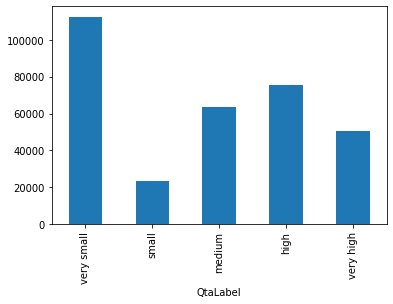

In [20]:
df['QtaLabel'].groupby(df['QtaLabel']).count().plot(kind='bar');

In [78]:
qtaE = {}
for cust, data in df['QtaLabel'].groupby(df['CustomerID']):
    qtaE[cust] = 0
    tot = data.count()
    for label, count in data.value_counts().iteritems():
        if count == 0:
            continue
        p = count / tot
        qtaE[cust] += -p * np.log2(p)
qtaE = pd.DataFrame(qtaE.items(), columns=['CustomerID', 'QtaEntropy'])
qtaE

,CustomerID,QtaEntropy
0,12346.0,0.000000
1,12747.0,2.161498
2,12748.0,1.590566
3,12749.0,2.084173
4,12820.0,1.504065
...,...,...
3804,18280.0,1.685475
3805,18281.0,1.378783
3806,18282.0,1.855389
3807,18283.0,0.931756


In [22]:
df['QtaLabel'].groupby(df['CustomerID']).describe()

,count,unique,top,freq
CustomerID,,,,
12346.0,1,1,very high,1
12747.0,88,5,high,29
12748.0,3752,5,very small,2475
12749.0,199,5,medium,71
12820.0,59,3,high,28
...,...,...,...,...
18280.0,10,4,medium,5
18281.0,7,3,high,4
18282.0,12,4,medium,4


In [33]:
df['TotSale'] = df['Qta'] * df['Sale']
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta,TotSale
0,539993,2011-04-01 10:00:00,1.95,13313,22386,JUMBO BAG PINK POLKADOT,10,19.5
1,539993,2011-04-01 10:00:00,0.42,13313,21499,BLUE POLKADOT WRAP,25,10.5
2,539993,2011-04-01 10:00:00,0.42,13313,21498,RED RETROSPOT WRAP,25,10.5
3,539993,2011-04-01 10:00:00,2.10,13313,22379,RECYCLING BAG RETROSPOT,5,10.5
4,539993,2011-04-01 10:00:00,1.25,13313,20718,RED RETROSPOT SHOPPER BAG,10,12.5
...,...,...,...,...,...,...,...,...
298715,581585,2011-09-12 12:31:00,0.95,15804,23145,ZINC TLIGHT HOLDER STAR LARGE,12,11.4
298716,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,23.4
298717,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8,23.6
298718,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF HANGING OWLS OLLIE BEAK,24,30.0


In [80]:
df['TotSaleLabel'] = pd.qcut(df['TotSale'], q=5, labels=[1, 2, 3, 4, 5])
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta,QtaLabel,TotSale,TotSaleLabel
0,539993,2011-04-01 10:00:00,1.95,13313,22386,JUMBO BAG PINK POLKADOT,10,High,19.5,4
1,539993,2011-04-01 10:00:00,0.42,13313,21499,BLUE POLKADOT WRAP,25,Very High,10.5,3
2,539993,2011-04-01 10:00:00,0.42,13313,21498,RED RETROSPOT WRAP,25,Very High,10.5,3
3,539993,2011-04-01 10:00:00,2.10,13313,22379,RECYCLING BAG RETROSPOT,5,Medium,10.5,3
4,539993,2011-04-01 10:00:00,1.25,13313,20718,RED RETROSPOT SHOPPER BAG,10,High,12.5,3
...,...,...,...,...,...,...,...,...,...,...
325452,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,High,23.4,5
325453,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8,High,23.6,5
325454,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF HANGING OWLS OLLIE BEAK,24,Very High,30.0,5
325455,581586,2011-09-12 12:49:00,8.95,13113,21217,RED RETROSPOT ROUND CAKE TINS,24,Very High,214.8,5


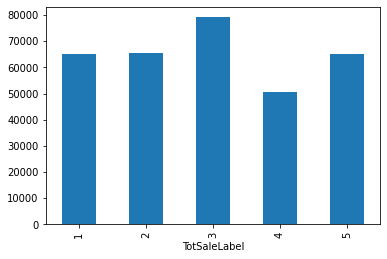

In [81]:
df['TotSaleLabel'].groupby(df['TotSaleLabel']).count().plot(kind='bar');

In [82]:
totSaleE = {}
for cust, data in df['TotSaleLabel'].groupby(df['CustomerID']):
    totSaleE[cust] = 0
    tot = data.count()
    for label, count in data.value_counts().iteritems():
        if count == 0:
            continue
        p = count / tot
        totSaleE[cust] += -p * np.log2(p)
totSaleE = pd.DataFrame(totSaleE.items(), columns=['CustomerID', 'TotSaleEntropy'])
totSaleE

,CustomerID,TotSaleEntropy
0,12346.0,0.000000
1,12747.0,1.351687
2,12748.0,1.811886
3,12749.0,1.625675
4,12820.0,1.491818
...,...,...
3804,18280.0,1.485475
3805,18281.0,0.985228
3806,18282.0,1.887919
3807,18283.0,0.976486


In [30]:
features = I.join(Iu.set_index('CustomerID'), on='CustomerID').join(
                Imax.set_index('CustomerID'), on='CustomerID').join(
                qtaE.set_index('CustomerID'), on='CustomerID').join(
                totSaleE.set_index('CustomerID'), on='CustomerID').set_index('CustomerID')
features

,I,Iu,Imax
CustomerID,,,
12747.0,792,29,140
12748.0,13173,1442,1222
12749.0,1225,120,626
12820.0,674,54,244
12821.0,68,5,68
...,...,...,...
18280.0,40,8,40
18281.0,52,5,52
18282.0,51,8,26


### RFM Analysis

RFM (***Recency***, ***Frequency***, ***Monetary***) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- ***Frequency*** represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases. This is actually slightly wrong. It’s the count of time periods the customer had a purchase in. So if using days as units, then it’s the count of days the customer had a purchase on;
- ***T*** represents the age of the customer in whatever time units chosen (weekly, in the above dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study;
- ***Recency*** represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase (thus if they have made only 1 purchase, the recency is 0);
- ***Monetary*** represents the average value of a given customer’s purchases. This is equal to the sum of all a customer’s purchases divided by the total number of purchases. Note that the denominator here is different than the frequency described above.

We will create those 3 customer attributes for each customer.

In [31]:
from lifetimes.utils import summary_data_from_transaction_data

In [34]:
rfm = summary_data_from_transaction_data(df, 'CustomerID', 'BasketDate', monetary_value_col='TotSale')
rfm.rename(columns={'frequency': 'Frequency',
                    'recency': 'Recency',
                    'monetary_value': 'Monetary'}, inplace=True)
rfm

,Frequency,Recency,T,Monetary
CustomerID,,,,
12747.0,8.0,318.0,341.0,236.845000
12748.0,95.0,335.0,340.0,186.703895
12749.0,3.0,313.0,336.0,522.850000
12820.0,3.0,282.0,327.0,251.053333
12821.0,0.0,0.0,96.0,0.000000
...,...,...,...,...
18280.0,0.0,0.0,160.0,0.000000
18281.0,0.0,0.0,4.0,0.000000
18282.0,1.0,85.0,301.0,60.790000


In [36]:
one_time_buyers = round(sum(rfm['Frequency'] == 0) / float(len(rfm)) * (100), 2)
print('Percentage of customers purchase the item only once:', one_time_buyers, '%')

Percentage of customers purchase the item only once: 38.05 %


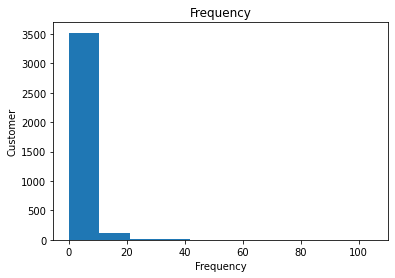

In [37]:
plt.hist(rfm['Frequency'])
plt.title('Frequency')
plt.ylabel('Customer' )
plt.xlabel('Frequency');

In [39]:
rfm = rfm[rfm['Frequency'] > 0]
rfm

,Frequency,Recency,T,Monetary
CustomerID,,,,
12747.0,8.0,318.0,341.0,236.845000
12748.0,95.0,335.0,340.0,186.703895
12749.0,3.0,313.0,336.0,522.850000
12820.0,3.0,282.0,327.0,251.053333
12822.0,1.0,17.0,88.0,155.980000
...,...,...,...,...
18272.0,5.0,223.0,226.0,494.592000
18273.0,1.0,107.0,258.0,51.000000
18282.0,1.0,85.0,301.0,60.790000


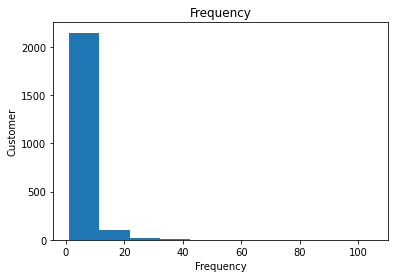

In [41]:
plt.hist(rfm['Frequency'])
plt.title('Frequency')
plt.ylabel('Customer' )
plt.xlabel('Frequency');

Now we change the distribution of monetary value with a histogram:

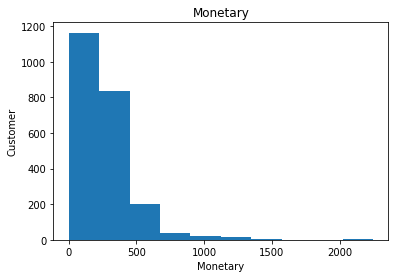

In [42]:
plt.hist(rfm['Monetary'])
plt.title('Monetary')
plt.ylabel('Customer', )
plt.xlabel('Monetary');

In [43]:
customer_profile = rfm.join(features, on='CustomerID')
customer_profile

,Frequency,Recency,T,Monetary,I,Iu,Imax
CustomerID,,,,,,,
12747.0,8.0,318.0,341.0,236.845000,792,29,140
12748.0,95.0,335.0,340.0,186.703895,13173,1442,1222
12749.0,3.0,313.0,336.0,522.850000,1225,120,626
12820.0,3.0,282.0,327.0,251.053333,674,54,244
12822.0,1.0,17.0,88.0,155.980000,456,37,370
...,...,...,...,...,...,...,...
18272.0,5.0,223.0,226.0,494.592000,1584,88,352
18273.0,1.0,107.0,258.0,51.000000,40,1,20
18282.0,1.0,85.0,301.0,60.790000,51,8,26


### RFM Score

Calculating the individual RFM Score can be done in several ways, you can calculate it using your own business calculation formula that roughly matches your customer base. This time we will use the quartil statistical method, i.e. dividing Score into four parts:

In [44]:
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles

,Frequency,Recency,T,Monetary
0.25,1.0,113.0,202.0,137.49
0.50,2.0,198.0,272.0,220.10
0.75,5.0,276.0,318.0,330.23


In [45]:
# Arguments (x=value, p=recency, monetary, frequency, d=quartiles)
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# Arguments (x=value, p=recency, monetary, frequency, k=quartiles)
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [46]:
# create RFM segmentation table
rfm['R'] = rfm['Recency'].apply(RScore, args=('Recency', quantiles,))
rfm['F'] = rfm['Frequency'].apply(FMScore, args=('Frequency', quantiles,))
rfm['M'] = rfm['Monetary'].apply(FMScore, args=('Monetary', quantiles,))
rfm

,Frequency,Recency,T,Monetary,R,F,M
CustomerID,,,,,,,
12747.0,8.0,318.0,341.0,236.845000,1,4,3
12748.0,95.0,335.0,340.0,186.703895,1,4,2
12749.0,3.0,313.0,336.0,522.850000,1,3,4
12820.0,3.0,282.0,327.0,251.053333,1,3,3
12822.0,1.0,17.0,88.0,155.980000,4,1,2
...,...,...,...,...,...,...,...
18272.0,5.0,223.0,226.0,494.592000,2,3,4
18273.0,1.0,107.0,258.0,51.000000,4,1,1
18282.0,1.0,85.0,301.0,60.790000,4,1,1


After the individual scores have been obtained, it is time to calculate the overall RFM score:

In [47]:
rfm['RFMScore'] = rfm[['R', 'F', 'M']].sum(axis=1)
rfm

,Frequency,Recency,T,Monetary,R,F,M,RFMScore
CustomerID,,,,,,,,
12747.0,8.0,318.0,341.0,236.845000,1,4,3,8
12748.0,95.0,335.0,340.0,186.703895,1,4,2,7
12749.0,3.0,313.0,336.0,522.850000,1,3,4,8
12820.0,3.0,282.0,327.0,251.053333,1,3,3,7
12822.0,1.0,17.0,88.0,155.980000,4,1,2,7
...,...,...,...,...,...,...,...,...
18272.0,5.0,223.0,226.0,494.592000,2,3,4,9
18273.0,1.0,107.0,258.0,51.000000,4,1,1,6
18282.0,1.0,85.0,301.0,60.790000,4,1,1,6


## Feature Engineering

In [48]:
customer_profile.corr()

,Frequency,Recency,T,Monetary,I,Iu,Imax
Frequency,1.000000,0.446790,0.323728,0.018347,0.695364,0.603366,0.174542
Recency,0.446790,1.000000,0.753729,0.083650,0.351573,0.324373,0.153493
T,0.323728,0.753729,1.000000,0.043904,0.240480,0.214616,0.072911
Monetary,0.018347,0.083650,0.043904,1.000000,0.465979,0.375615,0.764686
I,0.695364,0.351573,0.240480,0.465979,1.000000,0.754450,0.647040
Iu,0.603366,0.324373,0.214616,0.375615,0.754450,1.000000,0.560192
Imax,0.174542,0.153493,0.072911,0.764686,0.647040,0.560192,1.000000


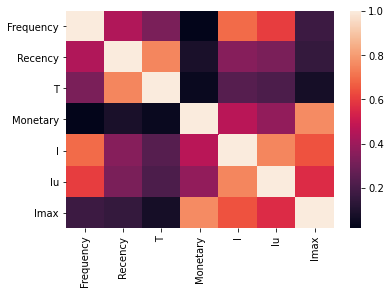

In [49]:
sns.heatmap(customer_profile.corr());

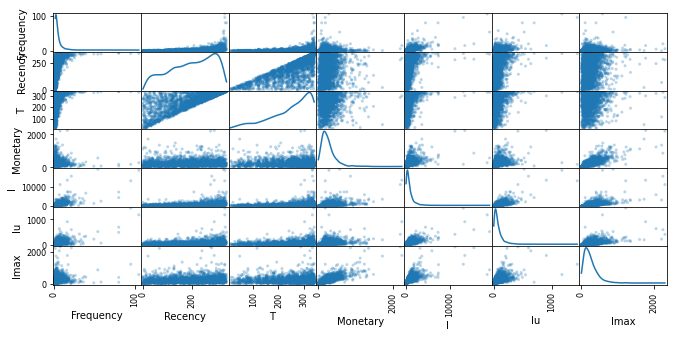

In [50]:
# produce a scatter matrix for each pair of features in the data
scatter_matrix(customer_profile, alpha=0.3, figsize=(11,5), diagonal='kde');

We can notice that we have a skewed distribution of the variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

In [52]:
log_customer_profile = pd.DataFrame({'I': np.log(customer_profile['I']),
                                     'Iu': np.log(customer_profile['Iu']),
                                     'Imax': np.log(customer_profile ['Imax']),
                                     # 'QtaEntropy': np.log(customer_profile['QtaEntropy']),
                                     # 'TotSaleEntropy': np.log(customer_profile['TotSaleEntropy']),
                                     'Monetary': np.log(customer_profile['Recency'] + 0.1), # can't take log(0) and so add a small number
                                     'Recency': np.log(customer_profile['Frequency']),
                                     'T': np.log(customer_profile ['T']),
                                     'Frequency': np.log(customer_profile['Monetary'] + 0.1)}) # can't take log(0) and so add a small number
log_customer_profile

,I,Iu,Imax,Monetary,Recency,T,Frequency
CustomerID,,,,,,,
12747.0,6.674561,3.367296,4.941642,5.762366,2.079442,5.831882,5.467828
12748.0,9.485925,7.273786,7.108244,5.814429,4.553877,5.828946,5.230059
12749.0,7.110696,4.787492,6.439350,5.746523,1.098612,5.817111,6.259486
12820.0,6.513230,3.988984,5.497168,5.642262,1.098612,5.789960,5.526064
12822.0,6.122493,3.610918,5.913503,2.839078,0.000000,4.477337,5.050369
...,...,...,...,...,...,...,...
18272.0,7.367709,4.477337,5.863631,5.407620,1.609438,5.420535,6.203935
18273.0,3.688879,0.000000,2.995732,4.673763,0.000000,5.552960,3.933784
18282.0,3.931826,2.079442,3.258097,4.443827,0.000000,5.707110,4.109069


In [53]:
log_customer_profile.corr()

,I,Iu,Imax,Monetary,Recency,T,Frequency
I,1.000000,0.805456,0.861466,0.390444,0.679442,0.258578,0.687330
Iu,0.805456,1.000000,0.720515,0.320911,0.514505,0.211562,0.567614
Imax,0.861466,0.720515,1.000000,0.183314,0.281963,0.091262,0.755388
Monetary,0.390444,0.320911,0.183314,1.000000,0.550972,0.675950,0.163308
Recency,0.679442,0.514505,0.281963,0.550972,1.000000,0.409715,0.152691
T,0.258578,0.211562,0.091262,0.675950,0.409715,1.000000,0.093619
Frequency,0.687330,0.567614,0.755388,0.163308,0.152691,0.093619,1.000000


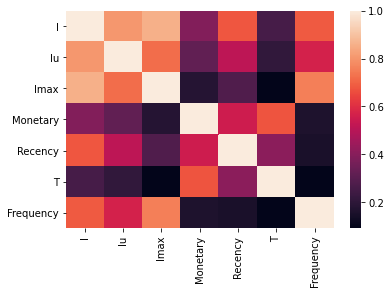

In [54]:
sns.heatmap(log_customer_profile.corr());

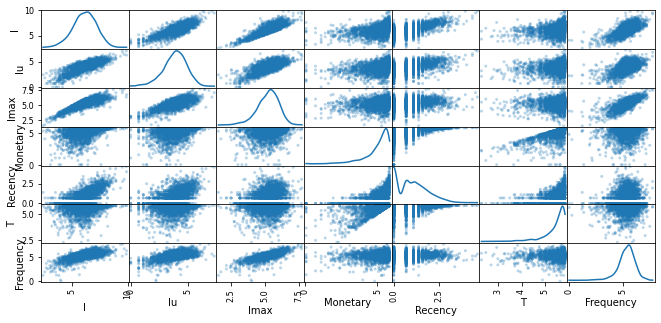

In [55]:
# produce a scatter matrix for each pair of features in the data
scatter_matrix(log_customer_profile, alpha=0.3, figsize=(11,5), diagonal='kde');

## Saving the Customer Profile model

In [56]:
log_customer_profile.to_csv('../dataset/customer_profile_model.csv', sep='\t')